Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from snowline import ReactiveImportanceSampler

sampler = ReactiveImportanceSampler(paramnames, loglike, transform)

sampler.run()

[snowline]     from: [0.53863772 0.5467972 ]


[snowline]     error: [0.04 0.04]


Maximum likelihood: L = -0.0 at:
    Hinz                0.5000 +- 0.0100
    Kunz                0.5000 +- 0.0100
[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 71.909%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 12 to 1 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1245


[snowline] Status: Have 683 total effective samples, done.



logZ = -11.971 +- 0.015

    Hinz                0.4998 +- 0.0099
    Kunz                0.4998 +- 0.0100


{'z': 6.323381403982087e-06,
 'zerr': 9.237878841068905e-08,
 'logz': -11.971256460608597,
 'logzerr': 0.014503396012631953,
 'ess': 0.8543162204621755,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 1245,
 'posterior': {'mean': [0.499806911454955, 0.49979787417928495],
  'stdev': [0.009914731021003188, 0.009996358026900352],
  'median': [0.5004987308759041, 0.5003176675771295],
  'errlo': [0.48956728990893783, 0.48946283189215034],
  'errup': [0.5097262935426254, 0.5094337381608769]},
 'samples': array([[0.50847081, 0.50729167],
        [0.4952125 , 0.50539525],
        [0.48368112, 0.49508479],
        ...,
        [0.49290512, 0.50460782],
        [0.49523572, 0.50106949],
        [0.48982832, 0.51057381]])}

This gave us error estimates and even estimated the evidence (Z)!

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 1245 times.


Visualisation
--------------------

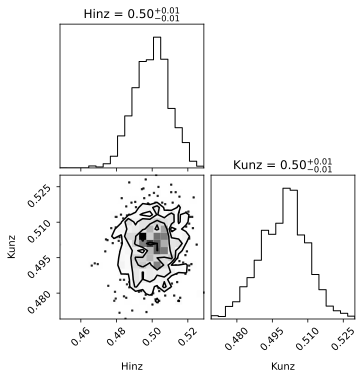

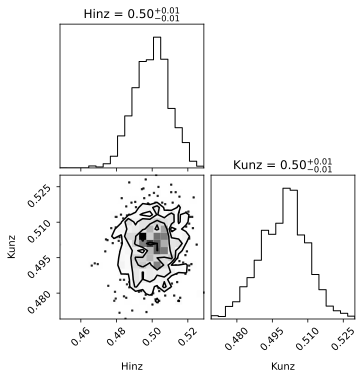

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

sampler = ReactiveImportanceSampler(paramnames, loglike_rosen, transform=transform_rosen)
sampler.run(min_ess=1000, max_ncalls=1000000)


[snowline]     from: [0.54717739 0.55969227]


[snowline]     error: [0.04 0.04]


Maximum likelihood: L = -0.0 at:
    Hinz                1.00 +- 0.48
    Kunz                1.00 +- 0.97
[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 14.274%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 2 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1269


[snowline] Status: Have 61 total effective samples, sampling 560 next.


[snowline]     sampling efficiency: 7.681%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 2 components


[snowline] Importance sampling 560 ...


[snowline] Likelihood function evaluations: 1829


[snowline] Status: Have 323 total effective samples, sampling 784 next.


[snowline]     sampling efficiency: 23.772%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 2 components


[snowline] Importance sampling 784 ...


[snowline] Likelihood function evaluations: 2613


[snowline] Status: Have 746 total effective samples, sampling 1097 next.


[snowline]     sampling efficiency: 34.803%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 9 to 4 components


[snowline] Importance sampling 1097 ...


[snowline] Likelihood function evaluations: 3710


[snowline] Status: Have 993 total effective samples, sampling 1535 next.



logZ = -8.122 +- 0.026

    Hinz                0.91 +- 0.32
    Kunz                0.93 +- 0.56


{'z': 0.0002968419764972986,
 'zerr': 7.845772303216482e-06,
 'logz': -8.122310626424401,
 'logzerr': 0.026087546228009018,
 'ess': 0.30642669062940425,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 3710,
 'posterior': {'mean': [0.9117452053398974, 0.9297615245398352],
  'stdev': [0.3167845248031876, 0.5637112423098553],
  'median': [0.9346675034842722, 0.8729814345177118],
  'errlo': [0.548905669785654, 0.2971737231948133],
  'errup': [1.2663713242314927, 1.603133862348642]},
 'samples': array([[0.8595748 , 0.76244927],
        [0.99889393, 0.95228364],
        [0.49704   , 0.21610045],
        ...,
        [1.02288248, 0.97985744],
        [1.38007393, 1.79347217],
        [1.32201573, 1.77628546]])}

This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 3710 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]


Removed no burn in


(-0.5, 4.0)

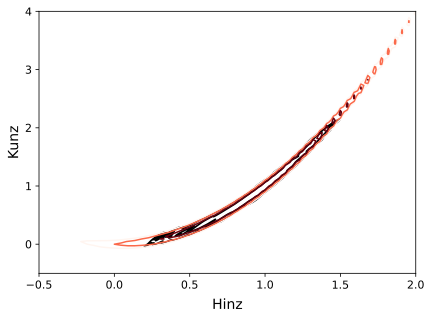

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-3, -2, -1], cmap='Reds')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the importance sampler was not able to perfectly follow the rosenbrock curvature. But it is a good start to roughly understand the uncertainties!

Removed no burn in


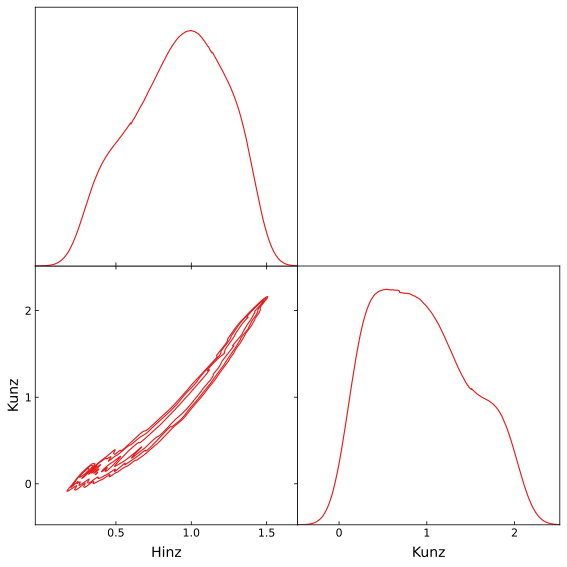

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);